In [58]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

In [59]:
uploaded=files.upload()

Saving Wolt_Dataset.csv to Wolt_Dataset (1).csv


# **Data Wrangling**

In [60]:
df=pd.read_csv('Wolt_Dataset.csv')
df=pd.DataFrame(df)
df

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21978,2019-09-30 00:00:00.000,GRC,1,1.0,0.0,2020-01-23 00:00:00.000,2020-01-23 00:00:00.000,21979,0.0,0.0,...,0.0,1.0,NaN,False,12.0,2.0,NaN,NaN,1.383,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21979,2019-09-30 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,21980,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21980,2019-09-30 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,21981,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21981,2019-09-30 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,21982,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [61]:
# Parsing the 'PURCHASE_COUNT_BY_STORE_TYPE' column to extract individual store types as columns
store_type_columns = df['PURCHASE_COUNT_BY_STORE_TYPE'].apply(lambda x: json.loads(x) if isinstance(x, str) else {})

# Creating a DataFrame from the extracted columns
store_type_df = pd.DataFrame(store_type_columns.tolist())

Because the customer who have not paid, we do not have information about those customer for the segmentation => We will eliminate those customers to clear the dataset


In [62]:
wolt_df=df[df['PURCHASE_COUNT']!=0]

In [63]:
wolt_df

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
7,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-10-14 00:00:00.000,2020-10-14 00:00:00.000,8,0.0,0.0,...,0.0,1.0,NaN,True,5.0,1.0,NaN,NaN,1.251,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
12,2019-09-01 00:00:00.000,FIN,19,19.0,0.0,2020-04-18 00:00:00.000,2020-10-27 00:00:00.000,13,0.0,8.0,...,0.0,0.0,NaN,True,7.0,3.0,11.0,9.0,3.303,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
13,2019-09-01 00:00:00.000,FIN,2,2.0,0.0,2020-08-21 00:00:00.000,2020-09-09 00:00:00.000,14,0.0,1.0,...,0.0,2.0,"[\n ""american""\n]",False,5.0,6.0,19.0,19.0,1.382,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21973,2019-09-30 00:00:00.000,FIN,1,1.0,0.0,2020-10-15 00:00:00.000,2020-10-15 00:00:00.000,21974,0.0,0.0,...,0.0,1.0,NaN,False,19.0,6.0,NaN,NaN,4.045,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21975,2019-09-30 00:00:00.000,GRC,4,4.0,0.0,2020-04-11 00:00:00.000,2020-04-27 00:00:00.000,21976,2.0,2.0,...,0.0,4.0,NaN,True,12.0,5.0,5.0,5.0,11.540,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21976,2019-09-30 00:00:00.000,DNK,1,1.0,0.0,2019-10-03 00:00:00.000,2019-10-03 00:00:00.000,21977,0.0,0.0,...,0.0,1.0,NaN,False,22.0,1.0,NaN,NaN,2.365,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21978,2019-09-30 00:00:00.000,GRC,1,1.0,0.0,2020-01-23 00:00:00.000,2020-01-23 00:00:00.000,21979,0.0,0.0,...,0.0,1.0,NaN,False,12.0,2.0,NaN,NaN,1.383,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [64]:
wolt_df.isnull().sum()

REGISTRATION_DATE                             0
REGISTRATION_COUNTRY                          0
PURCHASE_COUNT                                0
PURCHASE_COUNT_DELIVERY                       0
PURCHASE_COUNT_TAKEAWAY                       0
FIRST_PURCHASE_DAY                           64
LAST_PURCHASE_DAY                             1
USER_ID                                       0
BREAKFAST_PURCHASES                           0
LUNCH_PURCHASES                               0
EVENING_PURCHASES                             0
DINNER_PURCHASES                              0
LATE_NIGHT_PURCHASES                          0
TOTAL_PURCHASES_EUR                           0
DISTINCT_PURCHASE_VENUE_COUNT                 0
MIN_PURCHASE_VALUE_EUR                        0
MAX_PURCHASE_VALUE_EUR                        0
AVG_PURCHASE_VALUE_EUR                        0
PREFERRED_DEVICE                              1
IOS_PURCHASES                                 0
WEB_PURCHASES                           

In [65]:
wolt_df[wolt_df['FIRST_PURCHASE_DAY'].isnull()]

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
151,2019-09-01 00:00:00.000,DNK,3,3.0,0.0,NaN,2020-08-18 00:00:00.000,152,1.0,2.0,...,0.0,3.0,NaN,False,16.0,4.0,22.0,22.0,6.520,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
193,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,NaN,2019-09-01 00:00:00.000,194,0.0,0.0,...,0.0,1.0,NaN,False,20.0,7.0,NaN,NaN,10.284,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
400,2019-09-01 00:00:00.000,DNK,3,3.0,0.0,NaN,2019-10-04 00:00:00.000,401,0.0,2.0,...,0.0,3.0,NaN,False,23.0,2.0,26.0,26.0,8.635,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
552,2019-09-01 00:00:00.000,DNK,3,3.0,0.0,NaN,2020-04-25 00:00:00.000,553,0.0,0.0,...,0.0,3.0,NaN,True,4.0,5.0,0.0,0.0,0.041,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
555,2019-09-01 00:00:00.000,FIN,2,2.0,0.0,NaN,2020-08-28 00:00:00.000,556,0.0,0.0,...,2.0,0.0,"[\n ""american"",\n ""italian""\n]",True,18.0,7.0,59.0,59.0,0.536,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20978,2019-09-29 00:00:00.000,FIN,1,1.0,0.0,NaN,NaN,20979,0.0,1.0,...,0.0,0.0,NaN,False,3.0,6.0,NaN,NaN,5.087,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21094,2019-09-29 00:00:00.000,DNK,3,3.0,0.0,NaN,2020-07-23 00:00:00.000,21095,0.0,1.0,...,3.0,0.0,NaN,True,3.0,1.0,26.0,26.0,7.601,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21214,2019-09-29 00:00:00.000,DNK,13,12.0,1.0,NaN,2020-10-20 00:00:00.000,21215,0.0,4.0,...,8.0,0.0,"[\n ""mexican""\n]",True,8.0,6.0,33.0,12.0,1.287,"{\n ""General merchandise"": 1,\n ""Grocery"": 6..."
21384,2019-09-29 00:00:00.000,DNK,1,1.0,0.0,NaN,2019-09-29 00:00:00.000,21385,0.0,0.0,...,0.0,0.0,"[\n ""italian""\n]",False,20.0,1.0,NaN,NaN,1.441,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [66]:
# Fill NaN FIRST_PURCHASE_DAY and LAST_PURCHASE_DAY
wolt_df['FIRST_PURCHASE_DAY'] = wolt_df.apply(lambda row: row['REGISTRATION_DATE'] if pd.isna(row['FIRST_PURCHASE_DAY']) else row['FIRST_PURCHASE_DAY'], axis=1)
wolt_df['LAST_PURCHASE_DAY']=wolt_df.apply(lambda row: row['REGISTRATION_DATE'] if pd.isna(row['LAST_PURCHASE_DAY']) else row['LAST_PURCHASE_DAY'], axis=1)

<ipython-input-66-cec6ac5aee39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wolt_df['FIRST_PURCHASE_DAY'] = wolt_df.apply(lambda row: row['REGISTRATION_DATE'] if pd.isna(row['FIRST_PURCHASE_DAY']) else row['FIRST_PURCHASE_DAY'], axis=1)
<ipython-input-66-cec6ac5aee39>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wolt_df['LAST_PURCHASE_DAY']=wolt_df.apply(lambda row: row['REGISTRATION_DATE'] if pd.isna(row['LAST_PURCHASE_DAY']) else row['LAST_PURCHASE_DAY'], axis=1)


In [67]:
# Fill NaN PREFERRED_DEVICE
mode=wolt_df['PREFERRED_DEVICE'].mode()
wolt_df['PREFERRED_DEVICE']=wolt_df.apply(lambda row: mode if pd.isna(row['PREFERRED_DEVICE']) else row['PREFERRED_DEVICE'], axis=1 )


<ipython-input-67-d5414f509d00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wolt_df['PREFERRED_DEVICE']=wolt_df.apply(lambda row: mode if pd.isna(row['PREFERRED_DEVICE']) else row['PREFERRED_DEVICE'], axis=1 )


In [68]:
# Fill NaN PREFERRED_RESTAURANT TYPE
wolt_df['PREFERRED_RESTAURANT_TYPES'].unique()

array([nan, '[\n  "american"\n]', '[\n  "japanese"\n]',
       '[\n  "italian"\n]', '[\n  "middle eastern"\n]',
       '[\n  "italian",\n  "middle eastern",\n  "american"\n]',
       '[\n  "italian",\n  "mexican"\n]', '[\n  "indian"\n]',
       '[\n  "american",\n  "japanese"\n]',
       '[\n  "italian",\n  "american",\n  "japanese",\n  "mexican"\n]',
       '[\n  "italian",\n  "japanese"\n]',
       '[\n  "japanese",\n  "mexican"\n]',
       '[\n  "middle eastern",\n  "italian"\n]',
       '[\n  "american",\n  "italian"\n]',
       '[\n  "american",\n  "italian",\n  "mexican"\n]',
       '[\n  "american",\n  "mexican"\n]',
       '[\n  "american",\n  "italian",\n  "middle eastern"\n]',
       '[\n  "mexican"\n]', '[\n  "vietnamese"\n]',
       '[\n  "indian",\n  "american"\n]',
       '[\n  "american",\n  "mexican",\n  "japanese"\n]',
       '[\n  "japanese",\n  "middle eastern",\n  "indian"\n]',
       '[\n  "korean"\n]',
       '[\n  "american",\n  "italian",\n  "mexican",\n  "japan

In [69]:
# Fill NaN AVG_DAYS_BETWEEN_PURCHASES
wolt_df['FIRST_PURCHASE_DAY']=pd.to_datetime(wolt_df['FIRST_PURCHASE_DAY'])
wolt_df['LAST_PURCHASE_DAY']=pd.to_datetime(wolt_df['LAST_PURCHASE_DAY'])
def calculate_avg(row):
  if row['FIRST_PURCHASE_DAY']==row['LAST_PURCHASE_DAY']:
    return 1.0
  elif pd.notna(row['AVG_DAYS_BETWEEN_PURCHASES']) :
    return row['AVG_DAYS_BETWEEN_PURCHASES']
  else:
    AVG=((wolt_df['LAST_PURCHASE_DAY']-wolt_df['FIRST_PURCHASE_DAY']).dt.total_seconds()/86400)/row['PURCHASE_COUNT']
    return AVG

wolt_df['AVG_DAYS_BETWEEN_PURCHASES']=wolt_df.apply(calculate_avg,axis=1)

<ipython-input-69-8352e20cfb08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wolt_df['FIRST_PURCHASE_DAY']=pd.to_datetime(wolt_df['FIRST_PURCHASE_DAY'])
<ipython-input-69-8352e20cfb08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wolt_df['LAST_PURCHASE_DAY']=pd.to_datetime(wolt_df['LAST_PURCHASE_DAY'])
<ipython-input-69-8352e20cfb08>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [70]:
#Fill NaN  MEDIAN_DAYS_BETWEEN_PURCHASES
#Because we cannot find median if there aren't any day list -> set MEDIAN=AVG
wolt_df['MEDIAN_DAYS_BETWEEN_PURCHASES']=wolt_df.apply(lambda row: row['AVG_DAYS_BETWEEN_PURCHASES'] if pd.isna(row['MEDIAN_DAYS_BETWEEN_PURCHASES']) else row['MEDIAN_DAYS_BETWEEN_PURCHASES'], axis=1)


<ipython-input-70-bb431e4f4ee3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wolt_df['MEDIAN_DAYS_BETWEEN_PURCHASES']=wolt_df.apply(lambda row: row['AVG_DAYS_BETWEEN_PURCHASES'] if pd.isna(row['MEDIAN_DAYS_BETWEEN_PURCHASES']) else row['MEDIAN_DAYS_BETWEEN_PURCHASES'], axis=1)


In [71]:
wolt_df.isnull().sum()

REGISTRATION_DATE                             0
REGISTRATION_COUNTRY                          0
PURCHASE_COUNT                                0
PURCHASE_COUNT_DELIVERY                       0
PURCHASE_COUNT_TAKEAWAY                       0
FIRST_PURCHASE_DAY                            0
LAST_PURCHASE_DAY                             0
USER_ID                                       0
BREAKFAST_PURCHASES                           0
LUNCH_PURCHASES                               0
EVENING_PURCHASES                             0
DINNER_PURCHASES                              0
LATE_NIGHT_PURCHASES                          0
TOTAL_PURCHASES_EUR                           0
DISTINCT_PURCHASE_VENUE_COUNT                 0
MIN_PURCHASE_VALUE_EUR                        0
MAX_PURCHASE_VALUE_EUR                        0
AVG_PURCHASE_VALUE_EUR                        0
PREFERRED_DEVICE                              0
IOS_PURCHASES                                 0
WEB_PURCHASES                           

In [72]:
#Last check
wolt_df

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02,2020-09-02,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,1.0,1.0,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10,2020-05-25,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
7,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-10-14,2020-10-14,8,0.0,0.0,...,0.0,1.0,NaN,True,5.0,1.0,1.0,1.0,1.251,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
12,2019-09-01 00:00:00.000,FIN,19,19.0,0.0,2020-04-18,2020-10-27,13,0.0,8.0,...,0.0,0.0,NaN,True,7.0,3.0,11.0,9.0,3.303,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
13,2019-09-01 00:00:00.000,FIN,2,2.0,0.0,2020-08-21,2020-09-09,14,0.0,1.0,...,0.0,2.0,"[\n ""american""\n]",False,5.0,6.0,19.0,19.0,1.382,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21973,2019-09-30 00:00:00.000,FIN,1,1.0,0.0,2020-10-15,2020-10-15,21974,0.0,0.0,...,0.0,1.0,NaN,False,19.0,6.0,1.0,1.0,4.045,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21975,2019-09-30 00:00:00.000,GRC,4,4.0,0.0,2020-04-11,2020-04-27,21976,2.0,2.0,...,0.0,4.0,NaN,True,12.0,5.0,5.0,5.0,11.540,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21976,2019-09-30 00:00:00.000,DNK,1,1.0,0.0,2019-10-03,2019-10-03,21977,0.0,0.0,...,0.0,1.0,NaN,False,22.0,1.0,1.0,1.0,2.365,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
21978,2019-09-30 00:00:00.000,GRC,1,1.0,0.0,2020-01-23,2020-01-23,21979,0.0,0.0,...,0.0,1.0,NaN,False,12.0,2.0,1.0,1.0,1.383,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


# **EDA and Data Visualization**

# *RFM Method Segmentation*

R-Recency
F-Frequency
M-Monetary
Because of lack of the current date information, so the total order time will be used to replace Recency

In [73]:
#Monetary
wolt_df['TOTAL_PURCHASE_EUR']=wolt_df['PURCHASE_COUNT']*wolt_df['AVG_PURCHASE_VALUE_EUR']

<ipython-input-73-97e6c4d1b939>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wolt_df['TOTAL_PURCHASE_EUR']=wolt_df['PURCHASE_COUNT']*wolt_df['AVG_PURCHASE_VALUE_EUR']


In [74]:
wolt_df['AVG_DAYS_BETWEEN_PURCHASES'] = pd.to_numeric(wolt_df['AVG_DAYS_BETWEEN_PURCHASES'], errors='coerce')


<ipython-input-74-fddeb7ecc923>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wolt_df['AVG_DAYS_BETWEEN_PURCHASES'] = pd.to_numeric(wolt_df['AVG_DAYS_BETWEEN_PURCHASES'], errors='coerce')


**Segmentation**

1.   **VVIP**: This title has high criterias including Purchase Count(>99 times),  Average Euros Per Purchases(>149 euros), Average Days Between Purchases (<4 days), and Total Euro Purchases( >999 euros). The indexes show big pleasant and engagement of this customers' group.
2.   **LOYAL**: This title concentrates on the customers' frequency of purchases. Therefore the criterias do not focus on the monetary index including Purchase Count (>49 times),  Average Euros Per Purchases(>69 euros), Average Days Between Purchases (<4 days), and Total Euro Purchases( >99 euros). These indexes prove the engagement of this customers' group
3.  **POTENTIAL**: Customers in this group have higher indexes than normal customers inlcuding Purchase Count (>9 times),  Average Euros Per Purchases(>29 euros), Average Days Between Purchases (<31 days), and Total Euro Purchases( >99 euros). The indexs prove the higher interest of this customers' group to the business
4.  **NORMAL**: This group includes basic customers, first-time customers, rarely purchasing customers ,etc ... The indexes are not really significant or have a noticeable meaning.
5. **NOTICE**: This group includes irregular purchases and customers such as too high value purchase per one.


In [75]:
#Set index for RFM based attributes

#PURCHASE_COUNT
wolt_df['PURCHASE_COUNT_INDEX']=wolt_df['PURCHASE_COUNT'].apply(lambda x: 4 if x >=100 else( 3 if  x>=50 else ( 2 if x >=20 else(1))))

# AVG_PURCHASE_VALUE_EUR
wolt_df['AVG_PURCHASE_VALUE_EUR_INDEX']=wolt_df['AVG_PURCHASE_VALUE_EUR'].apply(lambda x: 4 if x>= 150 else( 3 if x>=70 else (2 if x>=30 else (1))))

# AVG_DAYS_BETWEEN_PURCHASES
wolt_df['AVG_DAYS_BETWEEN_PURCHASES_INDEX']=wolt_df['AVG_DAYS_BETWEEN_PURCHASES'].apply(lambda x: 4 if x <= 3 else( 3 if x <=10 else (2 if x<=30 else (1))))

#TOTAL_PURCHASE_EUR
wolt_df['TOTAL_PURCHASE_EUR_INDEX']=wolt_df['TOTAL_PURCHASE_EUR'].apply(lambda x: 4 if x >=1000 else( 3 if x >= 500 else (2 if x>=100 else (1))))

<ipython-input-75-2d0edb48d01c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wolt_df['PURCHASE_COUNT_INDEX']=wolt_df['PURCHASE_COUNT'].apply(lambda x: 4 if x >=100 else( 3 if  x>=50 else ( 2 if x >=20 else(1))))
<ipython-input-75-2d0edb48d01c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wolt_df['AVG_PURCHASE_VALUE_EUR_INDEX']=wolt_df['AVG_PURCHASE_VALUE_EUR'].apply(lambda x: 4 if x>= 150 else( 3 if x>=70 else (2 if x>=30 else (1))))
<ipython-input-75-2d0edb48d01c>:10: SettingWithCopyWarning: 
A val

In [76]:
#Customer Segmentation
def customer_segmentation(row):
  if row['PURCHASE_COUNT_INDEX']>= 3 and row['AVG_PURCHASE_VALUE_EUR_INDEX']>=2 and row['AVG_DAYS_BETWEEN_PURCHASES_INDEX']>=3 and row['TOTAL_PURCHASE_EUR_INDEX']==4:
    return 'VVIP'
  elif row['PURCHASE_COUNT_INDEX']>= 3 and row['AVG_PURCHASE_VALUE_EUR_INDEX']>=1 and row['AVG_DAYS_BETWEEN_PURCHASES_INDEX']>=3 and row['TOTAL_PURCHASE_EUR_INDEX']>=2:
    return 'LOYAL'
  elif row['PURCHASE_COUNT_INDEX']>= 2 and row['AVG_PURCHASE_VALUE_EUR_INDEX']>=2 and row['AVG_DAYS_BETWEEN_PURCHASES_INDEX']>=2 and row['TOTAL_PURCHASE_EUR_INDEX']>=2:
    return 'POTENTIAL'
  elif row['PURCHASE_COUNT_INDEX']==1 and row['AVG_PURCHASE_VALUE_EUR_INDEX']==1 and row['AVG_DAYS_BETWEEN_PURCHASES_INDEX']==1 and row['TOTAL_PURCHASE_EUR_INDEX']>3:
    return 'NOTICE'
  else:
    return 'NORMAL'

wolt_df['CUSTOMER_SEGMENTATION']=wolt_df.apply(customer_segmentation,axis=1)

<ipython-input-76-16cfd9eec563>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wolt_df['CUSTOMER_SEGMENTATION']=wolt_df.apply(customer_segmentation,axis=1)


In [77]:
wolt_df

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE,TOTAL_PURCHASE_EUR,PURCHASE_COUNT_INDEX,AVG_PURCHASE_VALUE_EUR_INDEX,AVG_DAYS_BETWEEN_PURCHASES_INDEX,TOTAL_PURCHASE_EUR_INDEX,CUSTOMER_SEGMENTATION
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02,2020-09-02,2,0.0,1.0,...,1.0,1.0,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",38.456,1,2,4,1,NORMAL
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10,2020-05-25,3,0.0,4.0,...,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9...",634.524,1,2,3,3,NORMAL
7,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-10-14,2020-10-14,8,0.0,0.0,...,1.0,1.0,1.251,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",19.228,1,1,4,1,NORMAL
12,2019-09-01 00:00:00.000,FIN,19,19.0,0.0,2020-04-18,2020-10-27,13,0.0,8.0,...,11.0,9.0,3.303,"{\n ""General merchandise"": 1,\n ""Grocery"": 9...",596.068,1,2,2,3,NORMAL
13,2019-09-01 00:00:00.000,FIN,2,2.0,0.0,2020-08-21,2020-09-09,14,0.0,1.0,...,19.0,19.0,1.382,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",119.416,1,2,2,2,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21973,2019-09-30 00:00:00.000,FIN,1,1.0,0.0,2020-10-15,2020-10-15,21974,0.0,0.0,...,1.0,1.0,4.045,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",26.312,1,1,4,1,NORMAL
21975,2019-09-30 00:00:00.000,GRC,4,4.0,0.0,2020-04-11,2020-04-27,21976,2.0,2.0,...,5.0,5.0,11.540,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",24.288,1,1,3,1,NORMAL
21976,2019-09-30 00:00:00.000,DNK,1,1.0,0.0,2019-10-03,2019-10-03,21977,0.0,0.0,...,1.0,1.0,2.365,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",56.672,1,2,4,1,NORMAL
21978,2019-09-30 00:00:00.000,GRC,1,1.0,0.0,2020-01-23,2020-01-23,21979,0.0,0.0,...,1.0,1.0,1.383,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",26.312,1,1,4,1,NORMAL


# **EDA**

**Visualization by Country**

In [78]:
 #Plotting to compare between countries, Average indexes are not applied because of different sample sizes

 #PURCHASE COUNT
 Country_PC=wolt_df.groupby(['REGISTRATION_COUNTRY'])['PURCHASE_COUNT'].sum().sort_values(ascending=False).head(5)

 #NUMBER OF USERS
 Country_User=wolt_df.groupby(['REGISTRATION_COUNTRY'])['USER_ID'].count().sort_values(ascending=False).head(5)

 #TOTAL_PURCHASE_EUR
 Country_TotalE=wolt_df.groupby(['REGISTRATION_COUNTRY'])['TOTAL_PURCHASE_EUR'].sum().sort_values(ascending=False).head(5)

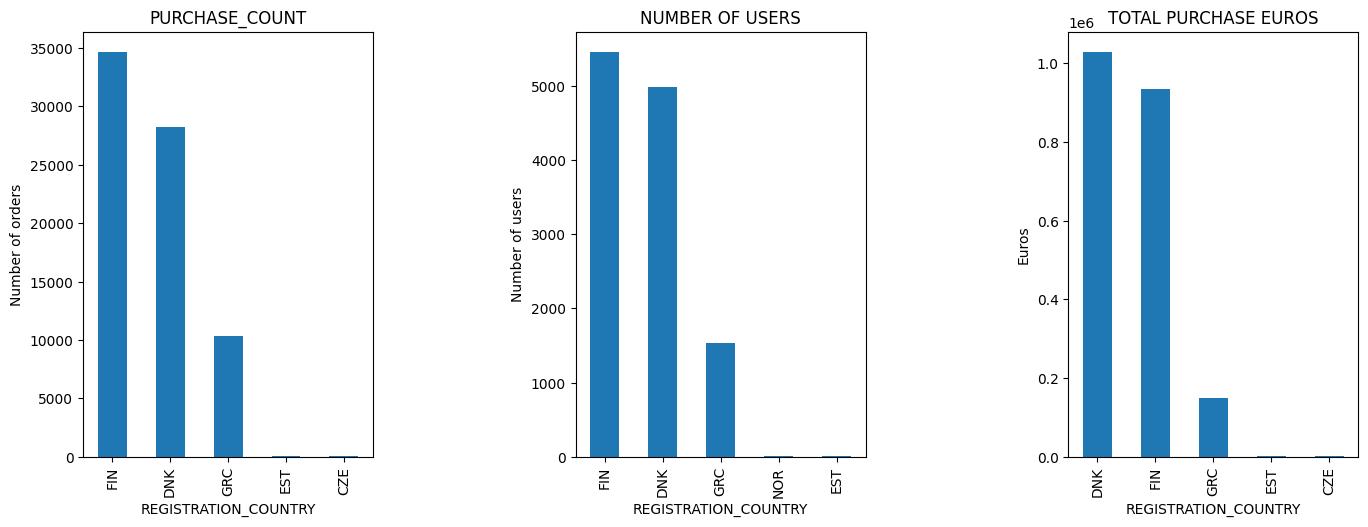

In [79]:
#Set up Subplots
fig=plt.figure(figsize=(15,5))
ax0=fig.add_subplot(1,3,1)
ax1=fig.add_subplot(1,3,2)
ax2=fig.add_subplot(1,3,3)

#Purchase count
Country_PC.plot(kind='bar',ax=ax0)
ax0.set_title('PURCHASE_COUNT')
ax0.set_ylabel('Number of orders')

#Number of users
Country_User.plot(kind='bar',ax=ax1)
ax1.set_title('NUMBER OF USERS')
ax1.set_ylabel('Number of users')

#Total purchases in euros
Country_TotalE.plot(kind='bar',ax=ax2)
ax2.set_title('TOTAL PURCHASE EUROS')
ax2.set_ylabel('Euros')
plt.subplots_adjust(left=0.05, right=0.9, top=0.9, bottom=0.05, wspace=0.7, hspace=0.4)
plt.show()

In [87]:
#Customer Segmentation by top 3 Country use Wolt

#Finland
FIN=wolt_df[wolt_df['REGISTRATION_COUNTRY']=='FIN']
FIN=FIN.groupby(['CUSTOMER_SEGMENTATION'])['CUSTOMER_SEGMENTATION'].count()

#Denmark
DNK=wolt_df[wolt_df['REGISTRATION_COUNTRY']=='DNK']
DNK=DNK.groupby(['CUSTOMER_SEGMENTATION'])['CUSTOMER_SEGMENTATION'].count()

#Greece
GRC=wolt_df[wolt_df['REGISTRATION_COUNTRY']=='GRC']
GRC=GRC.groupby(['CUSTOMER_SEGMENTATION'])['CUSTOMER_SEGMENTATION'].count()


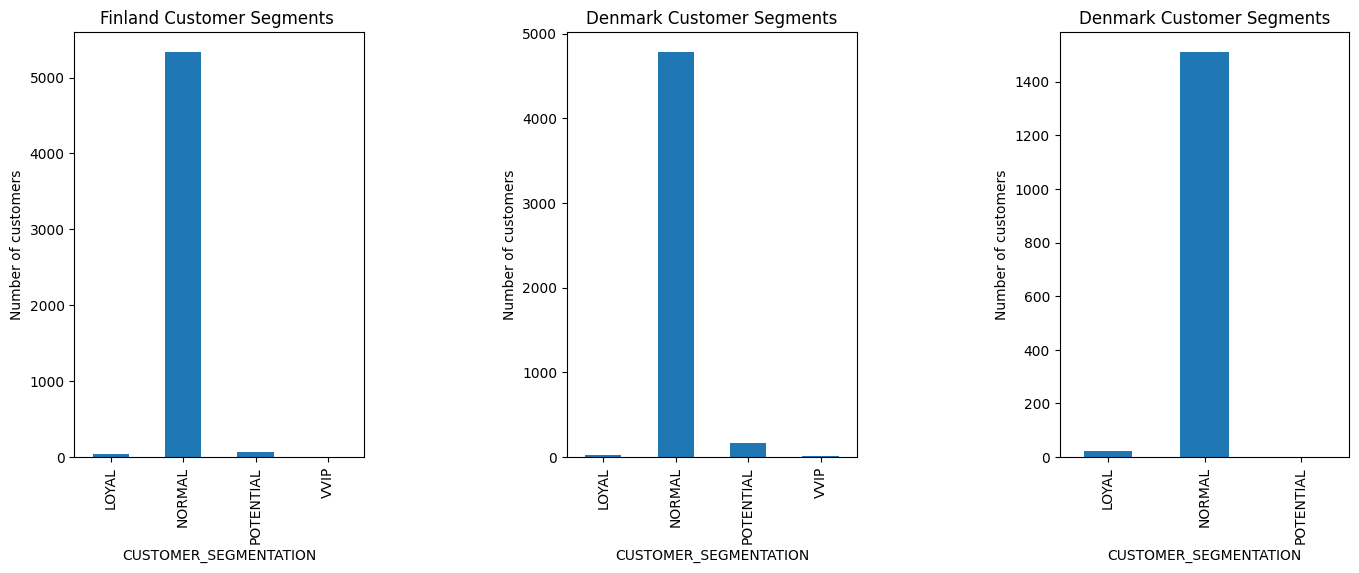

In [88]:
#Set up Subplots
fig=plt.figure(figsize=(15,5))
ax0=fig.add_subplot(1,3,1)
ax1=fig.add_subplot(1,3,2)
ax2=fig.add_subplot(1,3,3)

#Purchase count
FIN.plot(kind='bar',ax=ax0)
ax0.set_title('Finland Customer Segments ')
ax0.set_ylabel('Number of customers')

#Number of users
DNK.plot(kind='bar',ax=ax1)
ax1.set_title('Denmark Customer Segments')
ax1.set_ylabel('Number of customers')

#Total purchases in euros
GRC.plot(kind='bar',ax=ax2)
ax2.set_title('Denmark Customer Segments')
ax2.set_ylabel('Number of customers')
plt.subplots_adjust(left=0.05, right=0.9, top=0.9, bottom=0.05, wspace=0.7, hspace=0.4)
plt.show()

# **Conclusion**

Precisely, the top 3 countries using the food service app have a tremendous number of customers. However, most of them are basic customers, the process of attracting and transforming normal customers to potential customers and loyal customers is faint. The company should has a clear strategy for this process since the gap between normal customer group is drastically huge. My suggestion is creating campaigns, promotions or weekly events to attract customers comback more frequently. Moreover, cooperating with restaurants to create promotions to stimulate customers' demands should be considered.